# (Optional) Colab Setup
If you aren't using Colab, you can delete the following code cell. This is just to help students with mounting to Google Drive to access the other .py files and downloading the data, which is a little trickier on Colab than on your local machine using Jupyter.

In [ ]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
# fill in the path in your Google Drive in the string below. Note: do not escape slashes or spaces
import os
datadir = "/content/assignment4"
if not os.path.exists(datadir):
  !ln -s "/content/drive/MyDrive/path_to/assignment4" $datadir # TODO: Fill your Assignment 4 path
os.chdir(datadir)
!pwd

# GAN Debugging Notebook

This notebook is provided to help you debug your code. We provide you with small discriminator and generator networks that you can train on the MNIST dataset. This small GAN can be trained quickly on MNIST and will help you verify that your loss functions and training code is correct.

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [19]:
from gan.train import train
from gan.losses import discriminator_loss, generator_loss, ls_discriminator_loss, ls_generator_loss
from gan.utils import show_images

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## MNIST Dataset


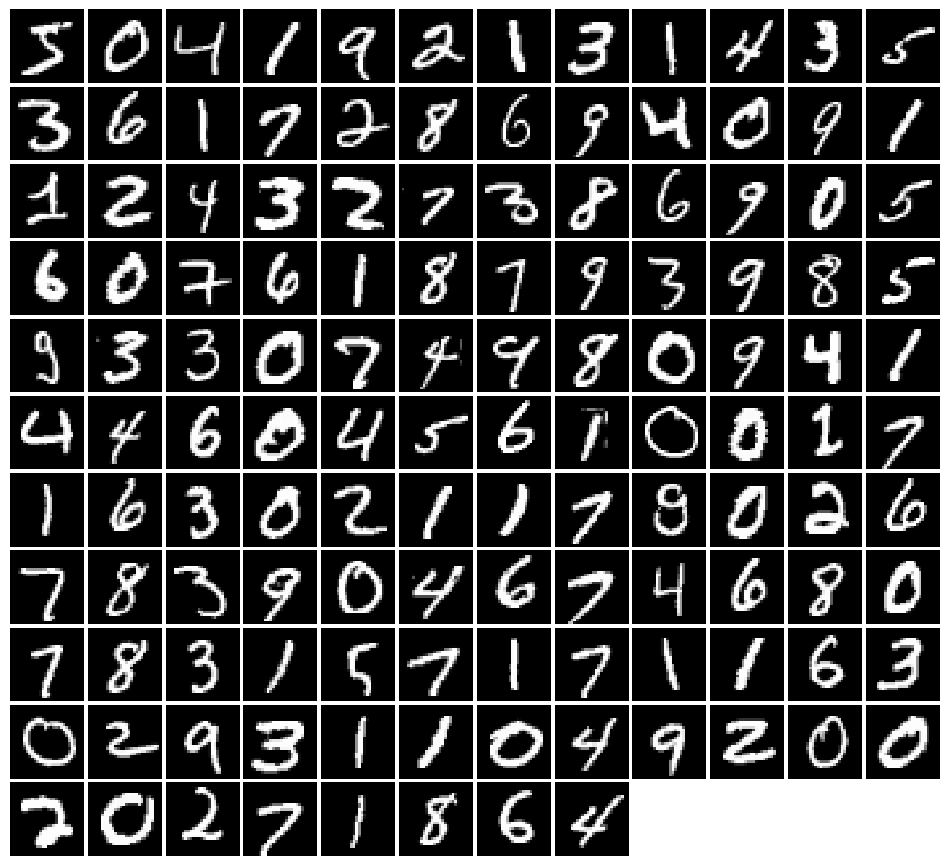

In [14]:
NOISE_DIM = 100
batch_size = 128

mnist = datasets.MNIST('./MNIST_data', train=True, download=True,
                           transform=transforms.ToTensor())
loader_train = DataLoader(mnist, batch_size=batch_size, drop_last=True)

try:
  imgs = next(iter(loader_train))[0].view(batch_size, 784).numpy().squeeze()
except:
  imgs = loader_train.__iter__().next()[0].view(batch_size, 784).numpy().squeeze()

show_images(imgs)

# Discriminator and Generator


In [15]:
class Flatten(nn.Module):
    def forward(self, x):
        N, C, H, W = x.size() # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image


In [16]:
def discriminator():
    """
    Initialize and return a simple discriminator model.
    """
    model = torch.nn.Sequential( Flatten(),
                                torch.nn.Linear(784, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 256), 
                                torch.nn.LeakyReLU(),
                                torch.nn.Linear(256, 1)
    )
    return model

In [17]:
def generator(noise_dim=NOISE_DIM):
    """
    Initialize and return a simple generator model.
    """
    
    model = nn.Sequential(
        torch.nn.Linear(noise_dim, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 1024),
        torch.nn.ReLU(),
        torch.nn.Linear(1024, 784),
        torch.nn.Tanh()
    )

    return model

Test to make sure the number of parameters in the generator is correct:

# Train

The simple model provided will train on MNIST in only a few minutes. You should expect results that resemble the following if your loss function and training loop implementations are correct:

<img src="gan_samples/mnist.jpg" width=500>

EPOCH:  1


Iter: 0, D: 1.355, G:0.7037


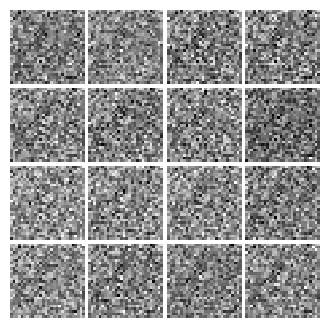


Iter: 250, D: 1.339, G:0.7752


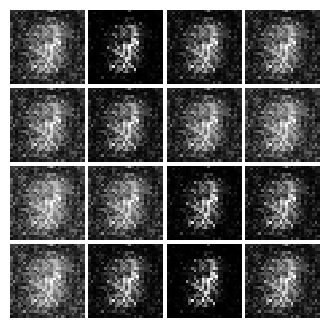


EPOCH:  2
Iter: 500, D: 0.9784, G:1.02


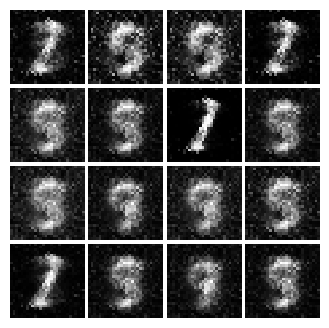


Iter: 750, D: 1.187, G:0.9627


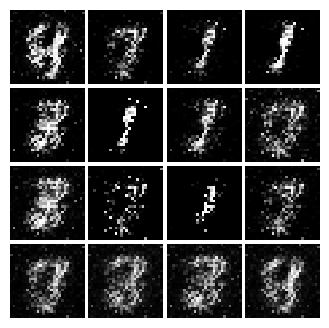


EPOCH:  3
Iter: 1000, D: 0.9405, G:1.828


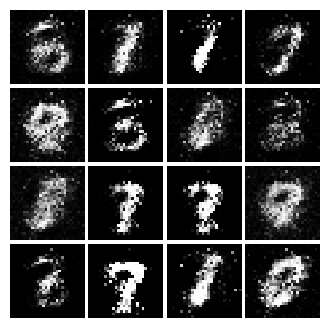


Iter: 1250, D: 1.111, G:0.9888


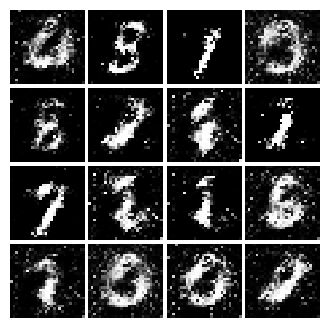


EPOCH:  4
Iter: 1500, D: 1.061, G:1.153


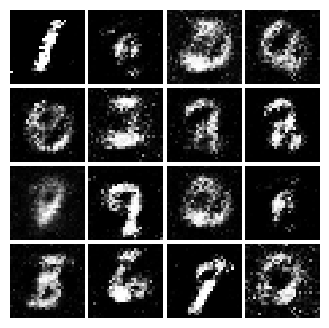


Iter: 1750, D: 1.243, G:1.016


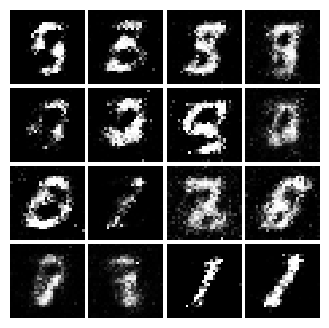


EPOCH:  5
Iter: 2000, D: 1.243, G:0.8359


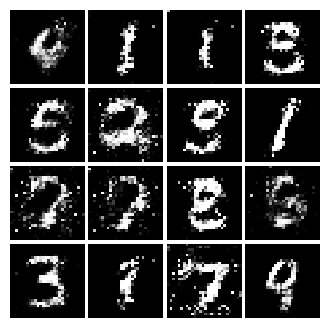


Iter: 2250, D: 1.305, G:0.8333


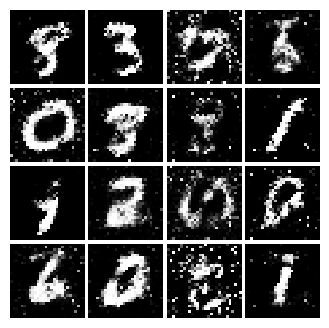


EPOCH:  6
Iter: 2500, D: 1.308, G:0.8263


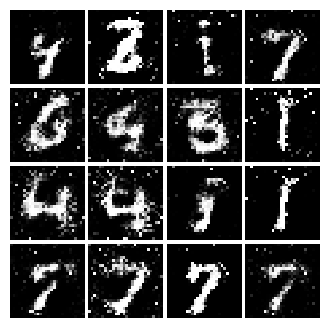


Iter: 2750, D: 1.242, G:0.8354


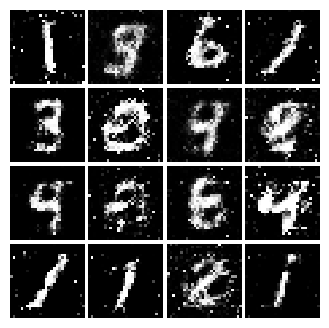


EPOCH:  7
Iter: 3000, D: 1.265, G:0.7867


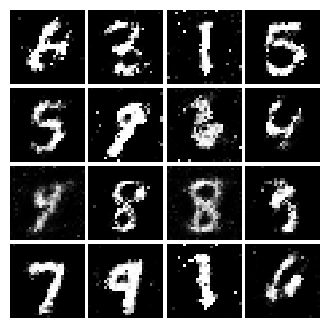


Iter: 3250, D: 1.214, G:0.8206


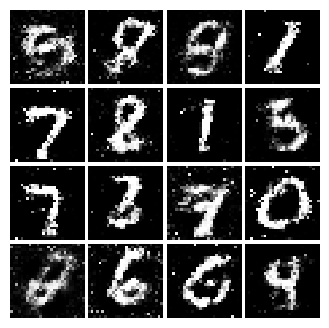


EPOCH:  8
Iter: 3500, D: 1.328, G:0.8289


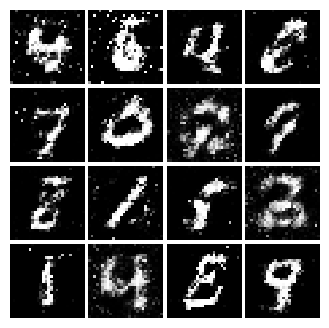


EPOCH:  9
Iter: 3750, D: 1.248, G:0.8094


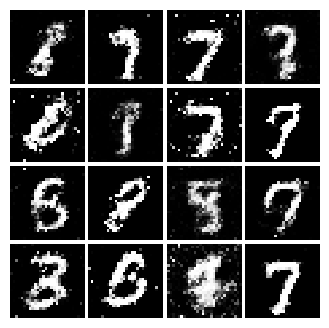


Iter: 4000, D: 1.395, G:0.7252


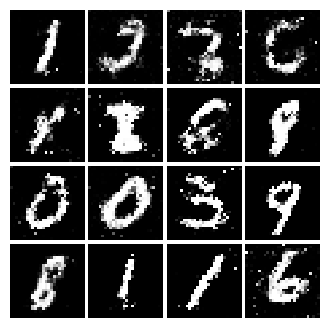


EPOCH:  10
Iter: 4250, D: 1.328, G:0.8679


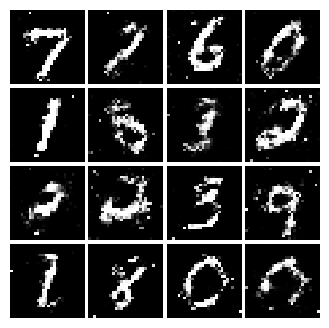


Iter: 4500, D: 1.295, G:0.901


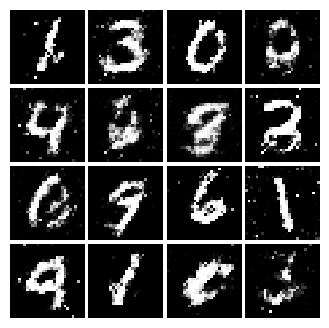

In [20]:
# original GAN
D = discriminator().to(device)
G = generator().to(device)

D_optimizer = torch.optim.Adam(D.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_optimizer = torch.optim.Adam(G.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D, G, D_optimizer, G_optimizer, discriminator_loss, generator_loss, train_loader=loader_train, num_epochs=10, device=device)

EPOCH:  1
Iter: 0, D: 0.4198, G:0.466


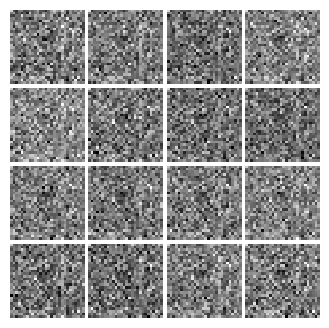


Iter: 250, D: 0.1713, G:0.2508


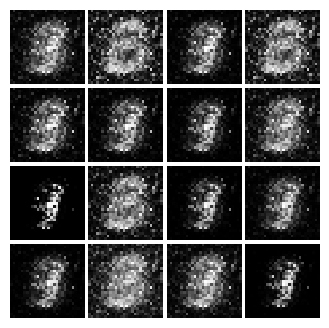


EPOCH:  2
Iter: 500, D: 0.1662, G:0.0761


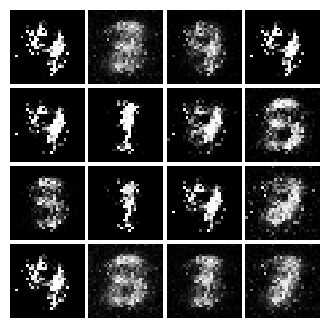


Iter: 750, D: 0.1457, G:0.4636


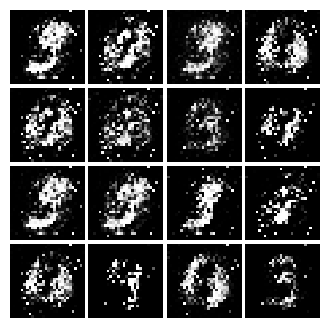


EPOCH:  3
Iter: 1000, D: 0.1037, G:0.3444


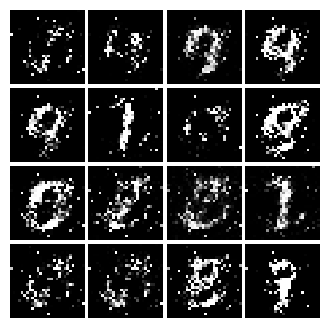


Iter: 1250, D: 0.1763, G:0.04005


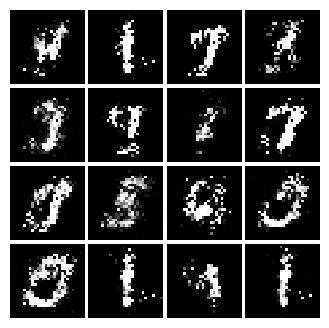


EPOCH:  4
Iter: 1500, D: 0.1621, G:0.2721


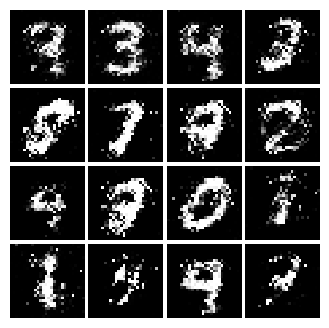


Iter: 1750, D: 0.1766, G:0.5299


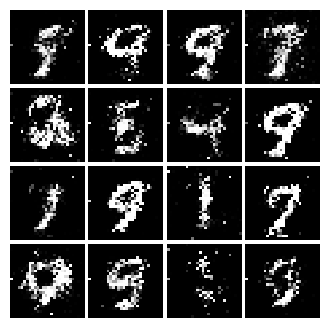


EPOCH:  5
Iter: 2000, D: 0.2265, G:0.1648


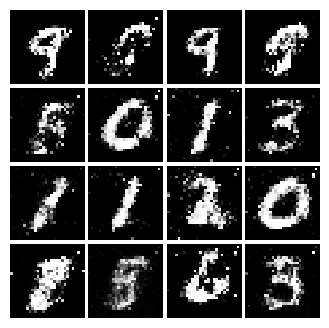


Iter: 2250, D: 0.2121, G:0.1809


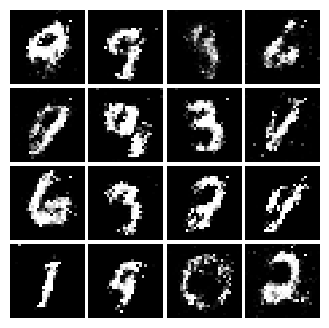


EPOCH:  6
Iter: 2500, D: 0.2228, G:0.1689


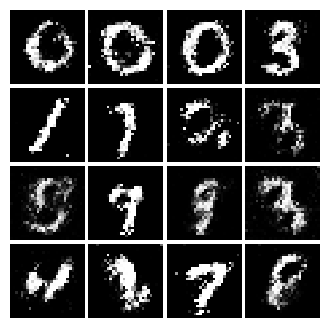


Iter: 2750, D: 0.2243, G:0.1813


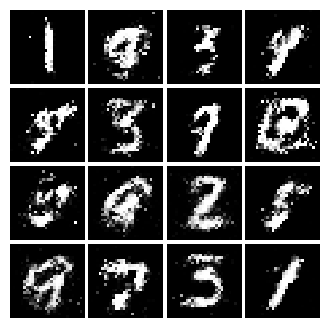


EPOCH:  7
Iter: 3000, D: 0.2148, G:0.1688


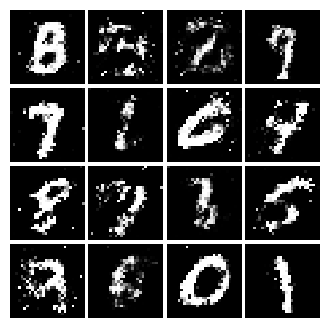


Iter: 3250, D: 0.2117, G:0.1848


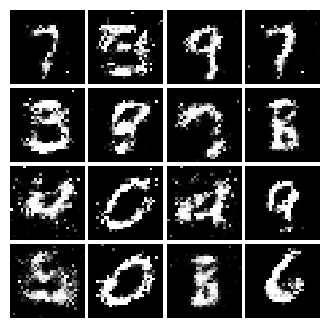


EPOCH:  8
Iter: 3500, D: 0.2101, G:0.185


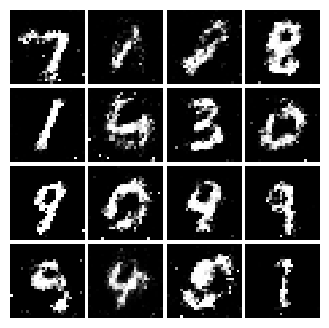


EPOCH:  9
Iter: 3750, D: 0.2203, G:0.1733


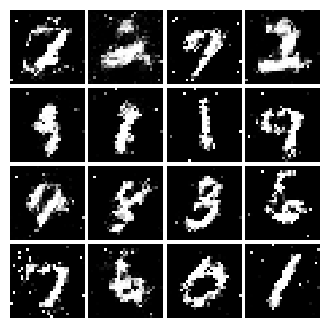


Iter: 4000, D: 0.2371, G:0.1437


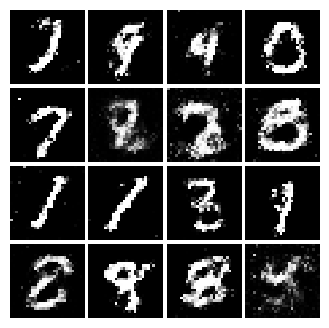


EPOCH:  10
Iter: 4250, D: 0.226, G:0.1679


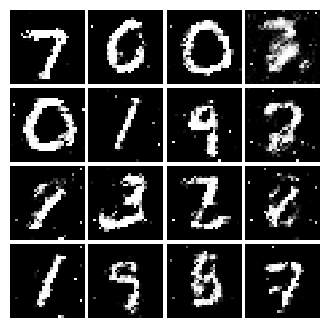


Iter: 4500, D: 0.2389, G:0.1547


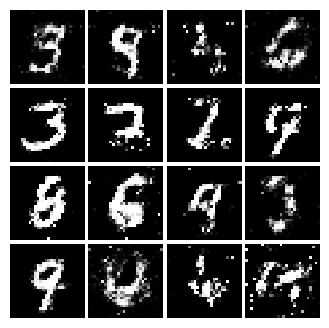

In [21]:
# LSGAN
D_LS = discriminator().to(device)
G_LS = generator().to(device)

D_LS_optimizer = torch.optim.Adam(D_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))
G_LS_optimizer = torch.optim.Adam(G_LS.parameters(), lr=1e-3, betas = (0.5, 0.999))

train(D_LS, G_LS, D_LS_optimizer, G_LS_optimizer, ls_discriminator_loss, ls_generator_loss, train_loader=loader_train, num_epochs=10, device=device)